In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from langdetect import detect
from scipy.stats import ttest_1samp

In [2]:
df = pd.read_csv('cleaned_Airbnb_Berlin.csv')

In [3]:
df.columns

Index(['index', 'review_id', 'review_date', 'reviewer_id', 'reviewer_name',
       'comments', 'listing_id', 'listing_url', 'listing_name', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_response_time',
       'host_response_rate', 'is_superhost', 'neighbourhood',
       'neighborhood_group', 'city', 'postal_code', 'country_code', 'country',
       'latitude', 'longitude', 'is_exact_location', 'property_type',
       'room_type', 'accomodates', 'bathrooms', 'bedrooms', 'beds',
       'square_feet', 'price', 'guests_included', 'min_nights', 'reviews',
       'first_review', 'last_review', 'overall_rating', 'accuracy_rating',
       'cleanliness_rating', 'checkin_rating', 'communication_rating',
       'location_rating', 'value_rating', 'instant_bookable',
       'business_travel_ready'],
      dtype='object')

In [4]:
df['neighborhood_group'].value_counts()

Mitte                           116933
Friedrichshain-Kreuzberg        105950
Pankow                           80207
Neukoeln                         50857
Charlottenburg - Wilmersdorf     32473
Tempelhof - Schoeneberg          29591
Lichtenberg                      11234
Treptow - Koepenick               8970
Steglitz - Zehlendorf             6618
Reinickendorf                     5514
Marzahn - Hellersdorf             2707
Spandau                           1713
Name: neighborhood_group, dtype: int64

In [5]:
df['neighborhood_group'].value_counts()['Mitte']

116933

To simplify the research and the data visualization and analysis, I am going to group all districts that do not have at least 10,000 properties as other

In [6]:
def filter_district(x):
    if x in ['Mitte', 'Friedrichshain-Kreuzberg', 'Pankow', 'Neukoeln', 'Charlottenburg - Wilmersdorf', 'Tempelhof - Schoeneberg']:
        return x
    else:
        return 'other'

In [7]:
district_df = df.copy() 

In [8]:
district_df.head()

,index,review_id,review_date,reviewer_id,reviewer_name,comments,listing_id,listing_url,listing_name,host_id,...,last_review,overall_rating,accuracy_rating,cleanliness_rating,checkin_rating,communication_rating,location_rating,value_rating,instant_bookable,business_travel_ready
0,0,58660447,2016-01-03,14876562,Dennis,"Very nice, clean appartement! Josh was really ...",10002699,https://www.airbnb.com/rooms/10002699,Trendy and peaceful KreuzkÃ¶lln,44696672,...,2016-01-03,100,8,10,6,10,10,10,f,f
1,2,58663795,2016-01-03,49367757,Andreea,Aki is really nice and friendly. We had an ama...,10006647,https://www.airbnb.com/rooms/10006647,Very central and very quite,40791092,...,2017-02-12,92,9,8,9,10,10,9,f,f
2,3,59003619,2016-01-05,46694292,Sasha,Aki is a very nice dude with a clean place in ...,10006647,https://www.airbnb.com/rooms/10006647,Very central and very quite,40791092,...,2017-02-12,92,9,8,9,10,10,9,f,f
3,4,66845661,2016-03-25,54542819,Yohana,Aki's place was easy to find and located in th...,10006647,https://www.airbnb.com/rooms/10006647,Very central and very quite,40791092,...,2017-02-12,92,9,8,9,10,10,9,f,f
4,5,67969785,2016-04-01,35352843,Mitchell,We had to wait 30mins for Aki to arrive but ot...,10006647,https://www.airbnb.com/rooms/10006647,Very central and very quite,40791092,...,2017-02-12,92,9,8,9,10,10,9,f,f


In [9]:
district_df['neighborhood_group'] = district_df['neighborhood_group'].apply(filter_district)

In [10]:
district_df['neighborhood_group'].nunique()

7

In [11]:
review_counts = district_df['neighborhood_group'].value_counts()

In [12]:
district_df.to_csv('district_df.csv')

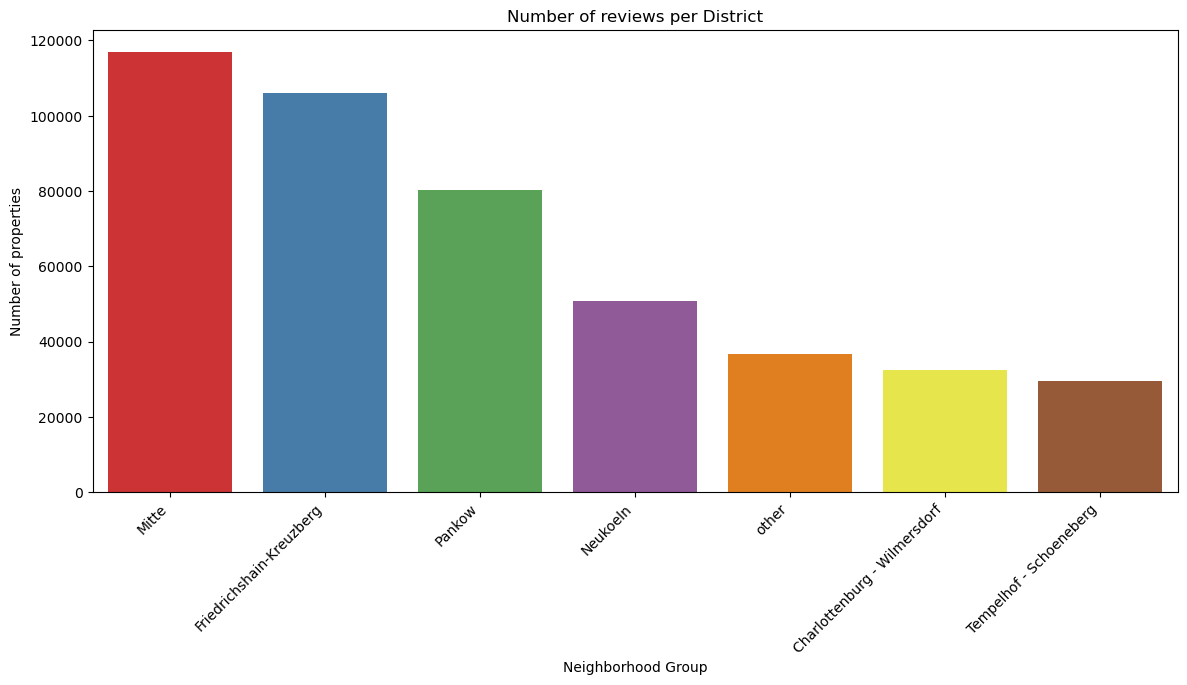

In [13]:
plt.figure(figsize=(14, 6))
sns.barplot(x=review_counts.index, y=review_counts.values, order=review_counts.index, palette='Set1')

plt.title('Number of reviews per District')
plt.xlabel('Neighborhood Group')
plt.ylabel('Number of properties')

plt.xticks(rotation=45, ha='right')

plt.show()

In [14]:
property_counts = district_df.groupby('neighborhood_group')['listing_id'].nunique().sort_values(ascending=False)
print(property_counts)

neighborhood_group
Friedrichshain-Kreuzberg        4767
Mitte                           4043
Pankow                          3072
Neukoeln                        2979
other                           1888
Charlottenburg - Wilmersdorf    1318
Tempelhof - Schoeneberg         1302
Name: listing_id, dtype: int64


In [68]:
property_count_all_df = district_df['listing_id'].nunique()
property_count_all_df

19369

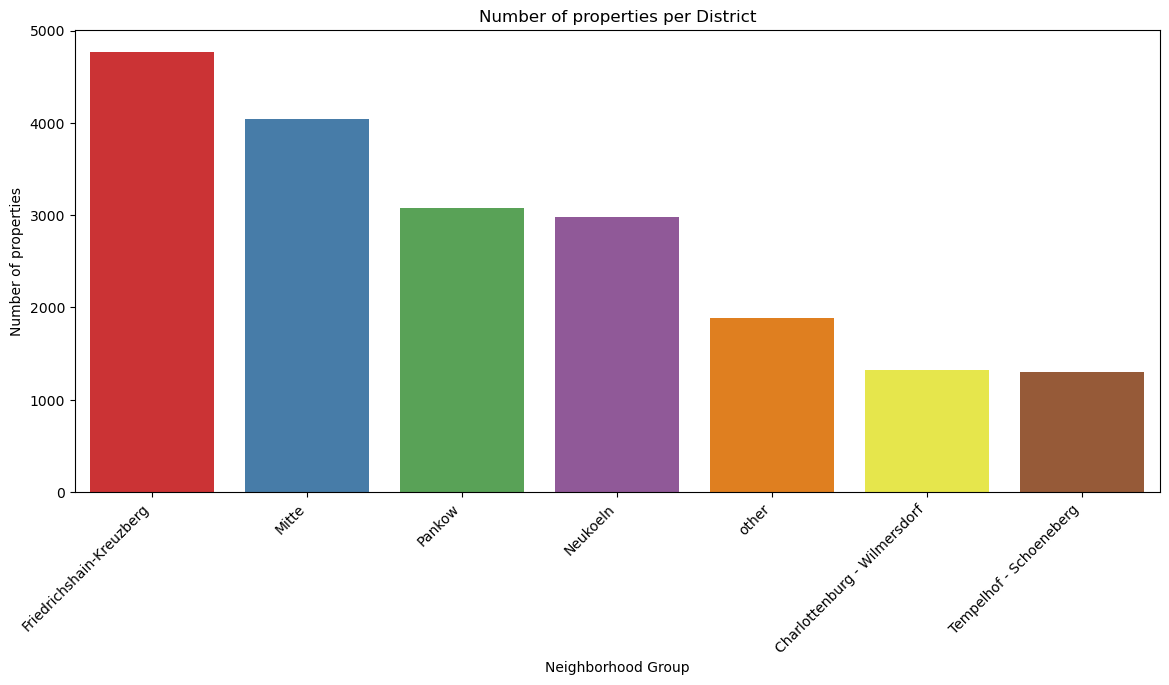

In [15]:
plt.figure(figsize=(14, 6))
sns.barplot(x=property_counts.index, y=property_counts.values, order=property_counts.index, palette='Set1')

plt.title('Number of properties per District')
plt.xlabel('Neighborhood Group')
plt.ylabel('Number of properties')

plt.xticks(rotation=45, ha='right')

plt.show()

In [16]:
ratio_review_per_property =  (review_counts / property_counts).sort_values(ascending=False)

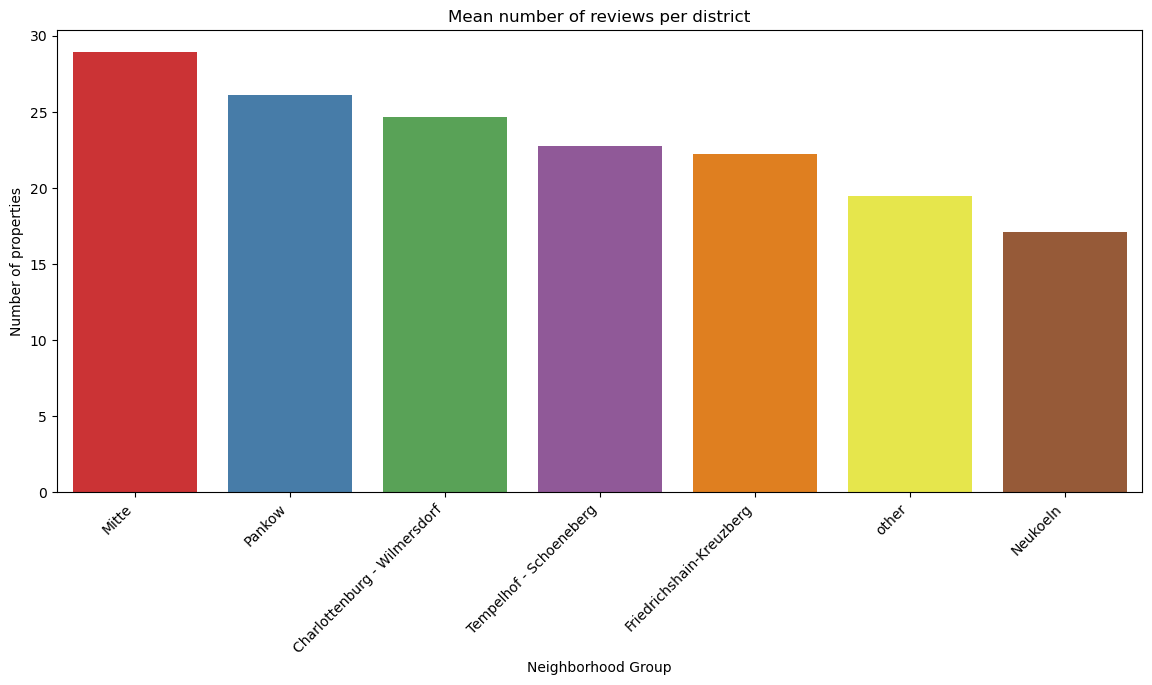

In [17]:
plt.figure(figsize=(14, 6))
sns.barplot(x=ratio_review_per_property.index, y=ratio_review_per_property.values, order=ratio_review_per_property.index, palette='Set1')

plt.title('Mean number of reviews per district')
plt.xlabel('Neighborhood Group')
plt.ylabel('Number of properties')

plt.xticks(rotation=45, ha='right')

plt.show()

In [19]:
def filter_data_per_district(data_frame, district):
    df = data_frame[data_frame['neighborhood_group'] == district]
    return df

In [202]:
'Friedrichshain-Kreuzberg', 'Pankow', 'Neukoeln', 'Charlottenburg - Wilmersdorf', 'Tempelhof - Schoeneberg'

mitte = filter_data_per_district(district_df, 'Mitte')
neukoeln = filter_data_per_district(district_df, 'Neukoeln')
pankow = filter_data_per_district(district_df, 'Pankow')
friedrichshain = filter_data_per_district(district_df, 'Friedrichshain-Kreuzberg')
tempelhof = filter_data_per_district(district_df, 'Tempelhof - Schoeneberg')
other_districts = filter_data_per_district(district_df, 'other')
charlottenburg = filter_data_per_district(district_df, 'Charlottenburg - Wilmersdorf')

Before starting analysing, I am going to make a hypothesis based on my expectations on this data. I would expect that tourists who stay in Mitte are on average more satisfied with the stay and leave a higher overall score.

In this df each row corresponds to one review, I am going to group by listing id to get one row per property and being able to compare satisfaction scores

In [90]:
mitte.columns

Index(['index', 'review_id', 'review_date', 'reviewer_id', 'reviewer_name',
       'comments', 'listing_id', 'listing_url', 'listing_name', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_response_time',
       'host_response_rate', 'is_superhost', 'neighbourhood',
       'neighborhood_group', 'city', 'postal_code', 'country_code', 'country',
       'latitude', 'longitude', 'is_exact_location', 'property_type',
       'room_type', 'accomodates', 'bathrooms', 'bedrooms', 'beds',
       'square_feet', 'price', 'guests_included', 'min_nights', 'reviews',
       'first_review', 'last_review', 'overall_rating', 'accuracy_rating',
       'cleanliness_rating', 'checkin_rating', 'communication_rating',
       'location_rating', 'value_rating', 'instant_bookable',
       'business_travel_ready'],
      dtype='object')

In [97]:
def filter_rating_per_unique_prop(data_frame):
    columns_to_select = ['overall_rating', 'accuracy_rating',
       'cleanliness_rating', 'checkin_rating', 'communication_rating',
       'location_rating', 'value_rating', 'price']
    df = data_frame.groupby('listing_id')[columns_to_select].mean()
    return df

In [203]:
mitte_unique_prop = filter_rating_per_unique_prop(mitte)
neukoeln_unique_prop = filter_rating_per_unique_prop(neukoeln)
pankow_unique_prop = filter_rating_per_unique_prop(pankow)
friedrichshain_unique_prop = filter_rating_per_unique_prop(friedrichshain)
tempelhof_unique_prop = filter_rating_per_unique_prop(tempelhof)
other_districts_unique_prop = filter_rating_per_unique_prop(other_districts)
charlottenburg_unique_prop = filter_rating_per_unique_prop(charlottenburg)

In [204]:
mitte_unique_prop['overall_rating'].describe()

count    4043.000000
mean       91.937917
std        15.587040
min         0.000000
25%        91.000000
50%        96.000000
75%       100.000000
max       100.000000
Name: overall_rating, dtype: float64

In [105]:
neukoeln_unique_prop['overall_rating'].describe()

count    2979.000000
mean       92.028197
std        17.560503
min         0.000000
25%        92.000000
50%        97.000000
75%       100.000000
max       100.000000
Name: overall_rating, dtype: float64

In [106]:
pankow_unique_prop['overall_rating'].describe()

count    3072.000000
mean       92.926107
std        15.199490
min         0.000000
25%        92.000000
50%        97.000000
75%       100.000000
max       100.000000
Name: overall_rating, dtype: float64

In [107]:
friedrichshain_unique_prop['overall_rating'].describe()

count    4767.000000
mean       92.483113
std        16.431334
min         0.000000
25%        92.000000
50%        97.000000
75%       100.000000
max       100.000000
Name: overall_rating, dtype: float64

In [108]:
tempelhof_unique_prop['overall_rating'].describe()

count    1302.000000
mean       92.659754
std        16.128335
min         0.000000
25%        92.000000
50%        97.000000
75%       100.000000
max       100.000000
Name: overall_rating, dtype: float64

In [109]:
other_districts_unique_prop['overall_rating'].describe()

count    1888.000000
mean       92.094809
std        17.252113
min         0.000000
25%        92.000000
50%        97.000000
75%       100.000000
max       100.000000
Name: overall_rating, dtype: float64

In [205]:
charlottenburg_unique_prop['overall_rating'].describe()

count    1318.000000
mean       91.724583
std        16.451882
min         0.000000
25%        91.000000
50%        96.000000
75%       100.000000
max       100.000000
Name: overall_rating, dtype: float64

The difference in the distribution of the overall score through district does not vary much. I am going to boxplot the most divergent ones

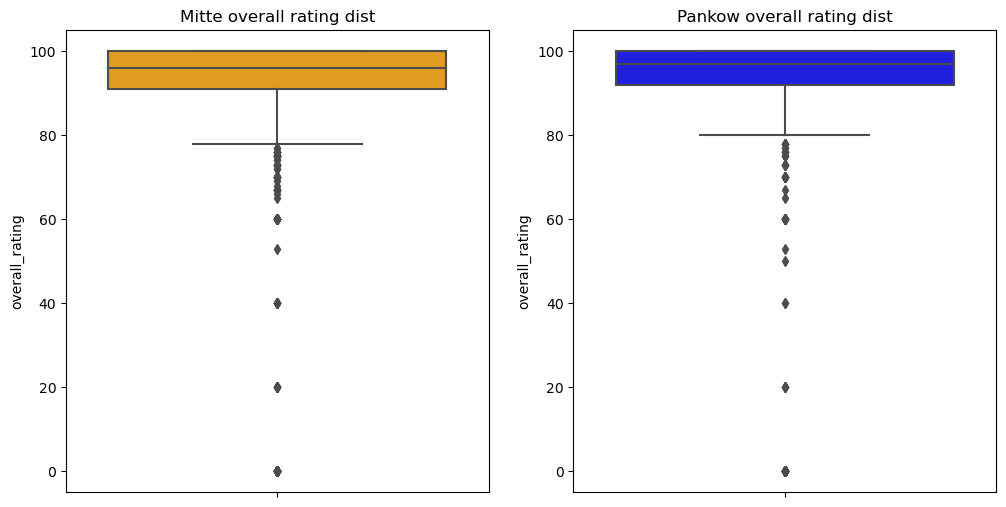

In [113]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=mitte_unique_prop, y='overall_rating', color='orange', ax=axes[0])
axes[0].set_title('Mitte overall rating dist')

sns.boxplot(data=pankow_unique_prop, y='overall_rating', color='blue', ax=axes[1])
axes[1].set_title('Pankow overall rating dist')

plt.show()

Comparing the two boxplot, we can observe that even though the difference is not much pronounced is significant. The mean is only little lower in Mitte. In Mitte, we can observe also a relatively more dense distribution between 60 and 70.

I am going to use also the kde plot instead to see more details

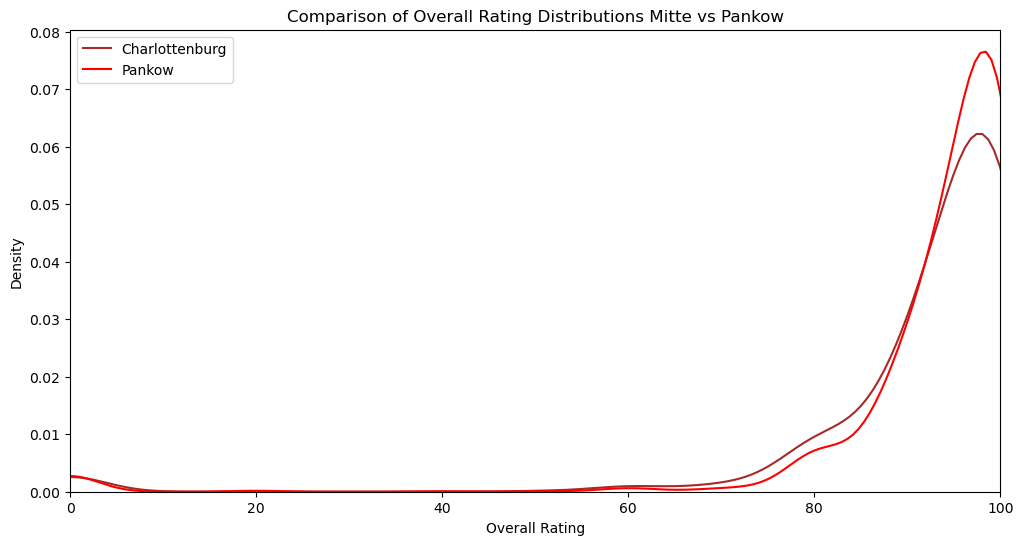

In [219]:
plt.figure(figsize=(12, 6))

sns.kdeplot(data=charlottenburg_unique_prop, x='overall_rating', color='brown', label='Charlottenburg')
sns.kdeplot(data=pankow_unique_prop, x='overall_rating', color='red', label='Pankow')

plt.title('Comparison of Overall Rating Distributions Mitte vs Pankow')
plt.xlabel('Overall Rating')
plt.ylabel('Density')
plt.xlim(0, 100)
plt.legend()

plt.show()


In [209]:
mean_series = [pankow_unique_prop['overall_rating'].mean(), 
               tempelhof_unique_prop['overall_rating'].mean(),              
               friedrichshain_unique_prop['overall_rating'].mean(),
               other_districts_unique_prop['overall_rating'].mean(),
               neukoeln_unique_prop['overall_rating'].mean(),
               mitte_unique_prop['overall_rating'].mean(),
               charlottenburg_unique_prop['overall_rating'].mean()]

distr = ['pankow', 'tempelhof', 'friedrichshain', 'other', 'neukoeln', 'mitte', 'charlottenburg']

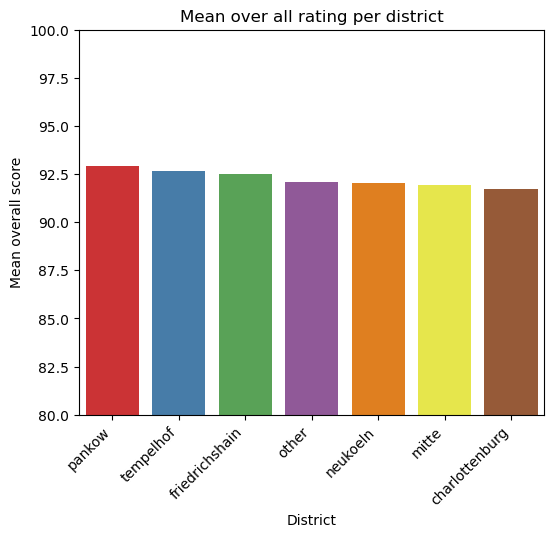

In [210]:
plt.figure(figsize=(6, 5))
sns.barplot(x=distr, y=mean_series, palette='Set1')

plt.title('Mean over all rating per district')
plt.xlabel('District')
plt.ylabel('Mean overall score')
plt.ylim(80, 100)
plt.xticks(rotation=45, ha='right')

plt.show()

OTHER RATINGS DISTRIBUTION

In the numerical analysis, we have found out that the variation on the specific scores is very low. It is relatively higher for cleanliness and location (which is moreover the dimension we are investigating now). In the next cells, I am going to investigate this further. We could also ask is the distribution of the overall score in Mitte more left centered just because of the location? Or should we assume that there are other aspects that are taken into account?

In [116]:
mitte_unique_prop['location_rating'].describe()

count    4043.000000
mean        9.306208
std         1.627701
min         0.000000
25%         9.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: location_rating, dtype: float64

In [117]:
neukoeln_unique_prop['location_rating'].describe()

count    2979.000000
mean        9.155086
std         1.839821
min         0.000000
25%         9.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: location_rating, dtype: float64

In [118]:
pankow_unique_prop['location_rating'].describe()

count    3072.000000
mean        9.422201
std         1.575765
min         0.000000
25%         9.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: location_rating, dtype: float64

In [119]:
friedrichshain_unique_prop['location_rating'].describe()

count    4767.000000
mean        9.447241
std         1.678808
min         0.000000
25%         9.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: location_rating, dtype: float64

In [120]:
other_districts_unique_prop['location_rating'].describe()

count    1888.000000
mean        8.949682
std         1.792083
min         0.000000
25%         9.000000
50%         9.000000
75%        10.000000
max        10.000000
Name: location_rating, dtype: float64

In [213]:
tempelhof_unique_prop['location_rating'].describe()

count    1302.000000
mean        9.304147
std         1.628332
min         0.000000
25%         9.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: location_rating, dtype: float64

In [215]:
charlottenburg_unique_prop['location_rating'].describe()

count    1318.000000
mean        9.281487
std         1.735460
min         0.000000
25%         9.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: location_rating, dtype: float64

The difference in location rating through the different districts is very limited. To compare I am going to plot a comparison between the most rated, Friedrichshain with the lowest rated others (non-central districts)

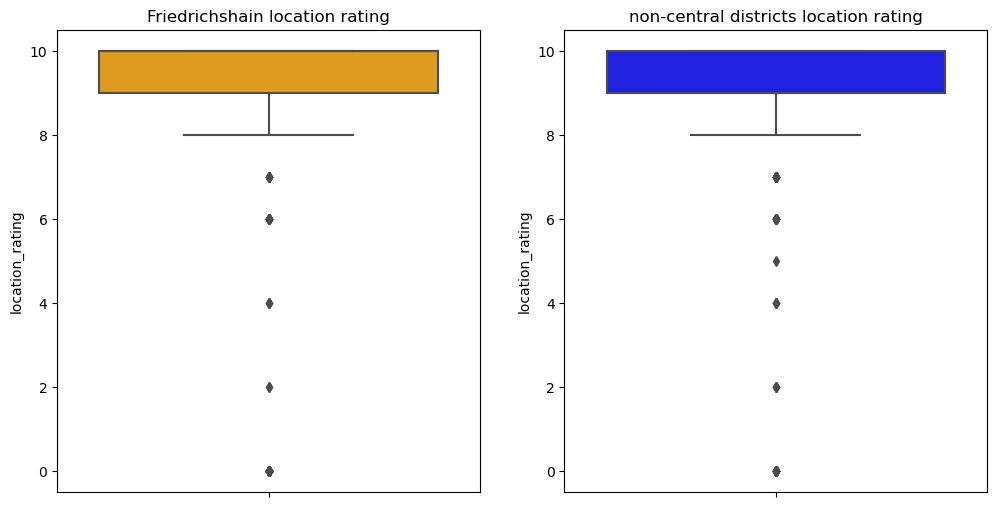

In [121]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=friedrichshain_unique_prop, y='location_rating', color='orange', ax=axes[0])
axes[0].set_title('Friedrichshain location rating')

sns.boxplot(data=other_districts_unique_prop, y='location_rating', color='blue', ax=axes[1])
axes[1].set_title('non-central districts location rating')

plt.show()

In [211]:
mean_loc_series = [pankow_unique_prop['location_rating'].mean(), 
                   tempelhof_unique_prop['location_rating'].mean(),                 
                   friedrichshain_unique_prop['location_rating'].mean(),
                   other_districts_unique_prop['location_rating'].mean(),
                    neukoeln_unique_prop['location_rating'].mean(),
                   mitte_unique_prop['location_rating'].mean(),
                   charlottenburg_unique_prop['location_rating'].mean()
]

distr = ['pankow', 'tempelhof', 'friedrichshain', 'other', 'neukoeln', 'mitte', 'charlottenbug']

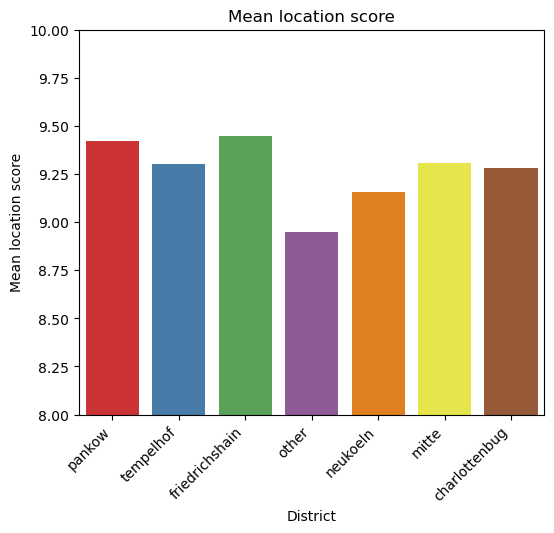

In [212]:
plt.figure(figsize=(6, 5))
sns.barplot(x=distr, y=mean_loc_series, palette='Set1')

plt.title('Mean location score')
plt.xlabel('District')
plt.ylabel('Mean location score')
plt.ylim(8, 10)
plt.xticks(rotation=45, ha='right')

plt.show()

In [156]:
mean_loc_series

[9.306208261192184,
 9.155085599194361,
 9.422200520833334,
 9.447241451646738,
 9.304147465437788,
 8.94968220338983]

With the Boxplot, since the variation is very limited, we cannot really grasp the difference. I am going to use the kde plot instead

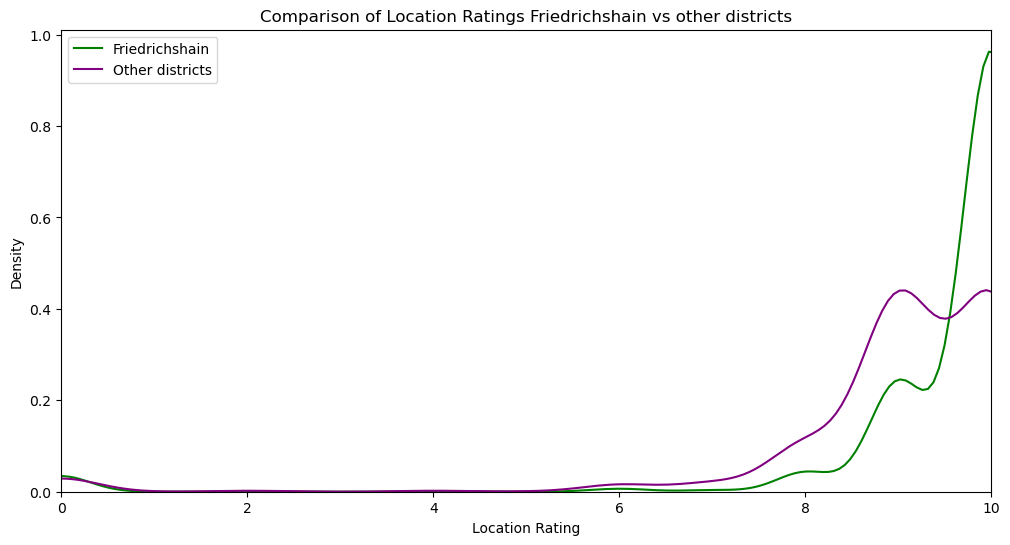

In [218]:
plt.figure(figsize=(12, 6))

sns.kdeplot(data=friedrichshain_unique_prop, x='location_rating', color='green', label='Friedrichshain')
sns.kdeplot(data=other_districts_unique_prop, x='location_rating', color='purple', label='Other districts')

plt.title('Comparison of Location Ratings Friedrichshain vs other districts')
plt.xlabel('Location Rating')
plt.ylabel('Density')
plt.xlim(0, 10)
plt.legend()

plt.show()

The location rating for properties in Mitte is not much different from the mean but slightly higher. This does not explain why Mitte (which is the very city center of Berlin, normally appraciated by tourists) seems to be so little appraciated by this dataset. A reason why this happens the higher price of properties. I am hypotising that the mean price of a location in Mitte is at least 10% than the average for other districts in Berlin.

someone thinks (hypothesises) that the mean of 
cholesterol values in the population is 5.6

we select a value for alpha of 0.05 (p-value threshold, significance level)
Two-sided test:
Null hypothesis or H0: mean location in Mitte >= mean location of all other districts + 10%
Alternative hyp or H1: mean cholesterol value < mean location of all other districts + 10%

First of all, I am going to calculate what is the mean location price for all other locations

In [40]:
all_districts_except_mitte = district_df[district_df['neighborhood_group'] != 'Mitte']

The dataset contains a row for each review. To calculate the mean of the properties, I will group by the rows for listing_id, I will take the mode (the value of the price per night for the same property is the same) and then calculate the mean

In [41]:
non_mitte_loc_mean_price = all_districts_except_mitte.groupby('listing_id')['price'].apply(lambda x: x.mode()).mean()

In [42]:
non_mitte_loc_mean_price

61.69117838966462

In [43]:
least_expected_mean_price_mitte = all_districts_except_mitte['price'].mean() + (non_mitte_loc_mean_price * 0.1)

In [44]:
least_expected_mean_price_mitte

71.25329930957396

In [45]:
grouped_mitte_locations_prices = mitte.groupby('listing_id')['price'].apply(lambda x: x.mode())

In [46]:
stat, pval = ttest_1samp(grouped_mitte_locations_prices, least_expected_mean_price_mitte)

In [47]:
print('stat is  ', stat)
print('pvalue for the one-tailed test is ', pval/2)

stat is   -0.19537093455612423
pvalue for the one-tailed test is  0.4225561944892967


The pvalue is not close to 0 but the stats is negative. The H0 cannot be rejected, it seems that the mean of locations in Mitte may be than 10% of the mean of the other districts

In [48]:
mitte_loc_mean_price = grouped_mitte_locations_prices.mean()

In [49]:
mitte_loc_mean_price

71.00346277516695

Also double checking in this data set the hypothesis cannot be rejected. Stays in Mitte can cost from 10% more than in the other districts

We can observe that even though we can see some difference in distribution between the most rated district and the least rated, the difference is played basically only in the high range of the score (from 8 to 10)

LANGUAGES DISTRIBTION

Now, I wanna investigate the language review distribution throug different districts. Would there be the same proportion of languages (and then we can assume nationalities) in the different districts of Berlin? Because of PC performancesand to be able to compare directly the data, I will use sample for this purpose

In [50]:
sampled_mitte = mitte.sample(n=3000, random_state=42)
sampled_neukoeln = neukoeln.sample(n=3000, random_state=42)
sampled_pankow = pankow.sample(n=3000, random_state=42)
sampled_friedrichshain = friedrichshain.sample(n=3000, random_state=42)
sampled_tempelhof = tempelhof.sample(n=3000, random_state=42)
sampled_others = other_districts.sample(n=3000, random_state=42)

In [51]:
sampled_mitte.head()

,index,review_id,review_date,reviewer_id,reviewer_name,comments,listing_id,listing_url,listing_name,host_id,...,last_review,overall_rating,accuracy_rating,cleanliness_rating,checkin_rating,communication_rating,location_rating,value_rating,instant_bookable,business_travel_ready
345083,348450,279563874,2018-06-21,9056482,Tom,"A nice, very modern und quite apartment in a g...",4643340,https://www.airbnb.com/rooms/4643340,Heart of Berlin Mitte â¢ Brandenburger Gate â...,11502578,...,2019-05-09,92,10,10,9,9,10,9,f,f
132381,133081,168746137,2017-07-10,26906047,Christofer,Patrick ist ein super Host. Hat sich mit Infor...,17613424,https://www.airbnb.com/rooms/17613424,"Cosy, bright Apartment in Linienstr, Berlin-Mitte",13627224,...,2018-12-02,95,10,10,10,10,10,10,f,f
264435,266182,430346534,2019-03-30,213202183,Sandy,"Nice spot! Well located in the city, definitel...",26546532,https://www.airbnb.com/rooms/26546532,Big and cosy appartment in Prenzlauerberg,199631255,...,2019-04-29,95,9,9,10,10,10,9,f,f
47730,48058,442691730,2019-04-24,76746881,Deborah,"The apartment had everything we needed, was ve...",12843786,https://www.airbnb.com/rooms/12843786,"Cosy apartment , Berlin city center",70140924,...,2019-05-02,91,10,10,10,10,10,9,t,f
353183,356595,6851501,2013-08-27,2127036,Benedetta,Karsten and Natalie are very friendly hosts. T...,499353,https://www.airbnb.com/rooms/499353,Central & tasteful apt in Mitte,955509,...,2019-04-28,97,10,10,10,10,10,10,f,f


In [52]:
def detect_language(review):
    try:
        return detect(review)
    except:
        return "unknown"  

sampled_mitte['language'] = sampled_mitte['comments'].apply(detect_language)
sampled_neukoeln['language'] = sampled_neukoeln['comments'].apply(detect_language)
sampled_pankow['language'] = sampled_pankow['comments'].apply(detect_language)
sampled_friedrichshain['language'] = sampled_friedrichshain['comments'].apply(detect_language)
sampled_tempelhof['language'] = sampled_tempelhof['comments'].apply(detect_language)
sampled_others['language'] = other_districts['comments'].apply(detect_language)

In [159]:
def filter_in_main_languages(x):
    if x in ['en', 'fr', 'de', 'es', 'unknown']:
        return x
    else:
        return 'other'
    
sampled_mitte['language'] = sampled_mitte['language'].apply(filter_in_main_languages)
sampled_neukoeln['language'] = sampled_neukoeln['language'].apply(filter_in_main_languages)
sampled_pankow['language'] = sampled_pankow['language'].apply(filter_in_main_languages)
sampled_friedrichshain['language'] = sampled_friedrichshain['language'].apply(filter_in_main_languages)
sampled_tempelhof['language'] = sampled_tempelhof['language'].apply(filter_in_main_languages)
sampled_others['language'] = sampled_others['language'].apply(filter_in_main_languages)

In [160]:
sampled_mitte_perc = (sampled_mitte['language'].value_counts() / sampled_mitte['language'].value_counts().sum()) * 100
sampled_neukoeln_perc = (sampled_neukoeln['language'].value_counts() / sampled_neukoeln['language'].value_counts().sum()) * 100
sampled_pankow_perc = (sampled_pankow['language'].value_counts() / sampled_pankow['language'].value_counts().sum()) * 100
sampled_friedrichshain_perc = (sampled_friedrichshain['language'].value_counts() / sampled_friedrichshain['language'].value_counts().sum()) * 100
sampled_tempelhof_perc = (sampled_tempelhof['language'].value_counts() / sampled_tempelhof['language'].value_counts().sum()) * 100
sampled_other_perc = (sampled_others['language'].value_counts() / sampled_others['language'].value_counts().sum()) * 100


In [161]:
sampled_mitte_perc

en         68.033333
de         15.900000
other       6.833333
fr          5.100000
es          3.933333
unknown     0.200000
Name: language, dtype: float64

In [162]:
sampled_neukoeln_perc

en         72.066667
de         16.333333
other       4.766667
fr          4.066667
es          2.666667
unknown     0.100000
Name: language, dtype: float64

In [163]:
sampled_pankow_perc

en         69.366667
de         18.733333
other       5.300000
fr          4.033333
es          2.466667
unknown     0.100000
Name: language, dtype: float64

In [164]:
sampled_friedrichshain_perc

en         70.800000
de         16.066667
other       5.800000
fr          4.866667
es          2.400000
unknown     0.066667
Name: language, dtype: float64

In [165]:
sampled_tempelhof_perc

en         62.833333
de         23.733333
other       6.066667
fr          3.900000
es          3.200000
unknown     0.266667
Name: language, dtype: float64

In [166]:
sampled_other_perc

en         54.333333
de         32.033333
other       6.133333
fr          3.966667
es          3.200000
unknown     0.333333
Name: language, dtype: float64

In [167]:
data = {
    'neukoeln': sampled_neukoeln_perc,
    'pankow': sampled_pankow_perc,
    'friedrichshain': sampled_friedrichshain_perc,
    'tempelhof': sampled_tempelhof_perc,
    'mitte': sampled_mitte_perc,
    'others': sampled_other_perc
}

In [168]:
combined_lang_perc = pd.concat([sampled_mitte_perc, sampled_friedrichshain_perc, sampled_neukoeln_perc, sampled_pankow_perc,
                   sampled_tempelhof_perc,
                   sampled_other_perc], axis=1)

In [169]:
combined_lang_perc.head()

,language,language,language,language,language,language
en,68.033333,70.800000,72.066667,69.366667,62.833333,54.333333
de,15.900000,16.066667,16.333333,18.733333,23.733333,32.033333
other,6.833333,5.800000,4.766667,5.300000,6.066667,6.133333
fr,5.100000,4.866667,4.066667,4.033333,3.900000,3.966667
es,3.933333,2.400000,2.666667,2.466667,3.200000,3.200000


In [170]:
combined_lang_perc.columns = ['mitte', 'friedrichshain', 'neokoeln', 'pankow', 'tempelhof',  'other']

In [171]:
combined_lang_perc.head()

,mitte,friedrichshain,neokoeln,pankow,tempelhof,other
en,68.033333,70.800000,72.066667,69.366667,62.833333,54.333333
de,15.900000,16.066667,16.333333,18.733333,23.733333,32.033333
other,6.833333,5.800000,4.766667,5.300000,6.066667,6.133333
fr,5.100000,4.866667,4.066667,4.033333,3.900000,3.966667
es,3.933333,2.400000,2.666667,2.466667,3.200000,3.200000


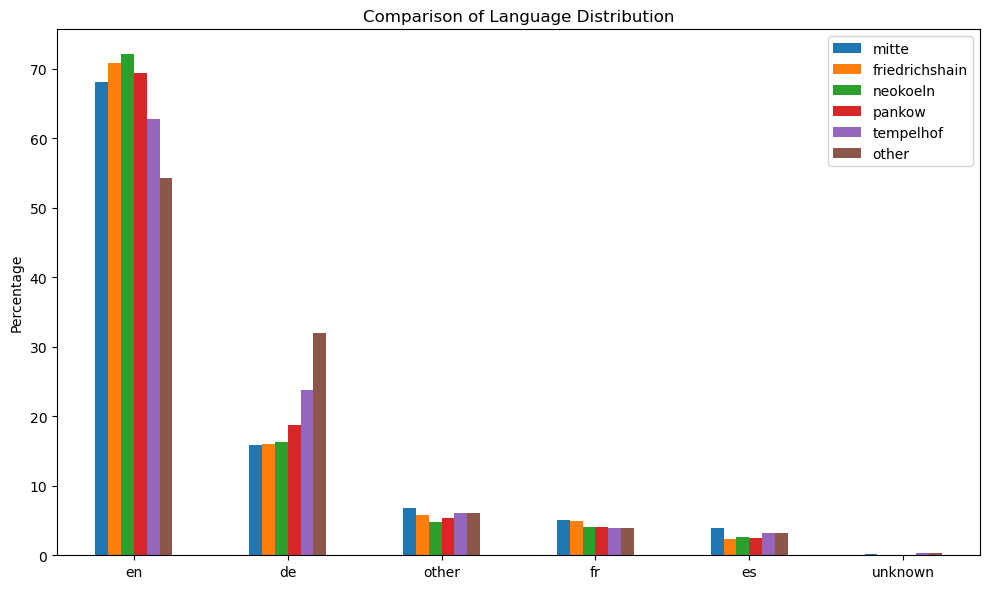

In [172]:
ax = combined_lang_perc.plot(kind='bar', figsize=(10, 6))
ax.set_ylabel('Percentage')
ax.set_title('Comparison of Language Distribution')
plt.xticks(rotation=0)  
plt.tight_layout()
plt.show()

We can observe that the percentage of English reviews compared with German reviews varies much through districts. The max percentage of English reviews is in Neukoeln and minimal in other than central districts (74.3 vs 54.9), while the max percentage of German reviews is in other districts compared to the min Neukoeln (15.6 vs 32.9). The other rappresented language are French and Spanish, the highest percentage for French reviews is Friedrichshain, while for Spanish ones is Mitte.